In [16]:
# The following program has been adapted from the tensorflow tutorial in
# https://www.tensorflow.org/tutorials/images/classification

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [18]:
#batch_size defines the number of samples that will be propagated through the network
#batch_size is often less than the number of training samples, testing samples
#However, batch_size that is set greater than the number of training samples 
#or testing samples does no harm.

#batch_size = 32  #a traditional batch_size found in keras examples
batch_size = 5 
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                    'data2/train/', 
                     class_names=['car', 'flower', 'fruit'], 
                     image_size=(img_height, img_width), 
                     batch_size=batch_size,
                     seed=123)

test_ds =  tf.keras.preprocessing.image_dataset_from_directory(
                    'data2/test/', 
                     class_names=['car', 'flower', 'fruit'], 
                     image_size=(img_height, img_width), 
                     batch_size=batch_size,
                     seed=123)

print(train_ds.class_names)
print( len(list(train_ds)) )

Found 15 files belonging to 3 classes.
Found 12 files belonging to 3 classes.
['car', 'flower', 'fruit']
3


<ipython-input-19-476f6d1d8feb>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 5, i + 1)


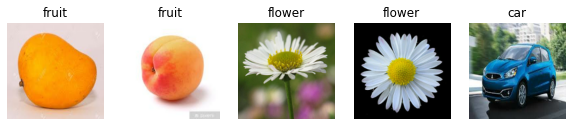

In [19]:
theClassNames = train_ds.class_names #class_names was already set earlier as ['car', 'flower', 'fruit'] 
plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  #for i in range(15):
  for i in range(batch_size):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(theClassNames[labels[i]])
    plt.axis("off")

In [20]:
print(' ')
print( 'train_ds is:' )
print(train_ds)
print(' ')

 
train_ds is:
<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>
 


In [21]:
print(' ')
print('at this point, train_ds and test_ds type is:')
print( 'train_ds type: ', type(train_ds) )
print( 'test_ds type: ', type(test_ds) )
print(' ')

 
at this point, train_ds and test_ds type is:
train_ds type:  <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
test_ds type:  <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
 


In [22]:
#Create the model
num_classes = 3  # dimensionality of the output space
model = Sequential([
  #In input_shape=(img_height, img_width, 3), the last 3 is number of channels (RGB)
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  #filters=16 (i.e. number of filters). See CNN slides, slide #23. A single input image is filtered  
  #seperately through 16 filters. Each filter generates a feature map (filtered version of the image)
  #from that input image. Thus, 16 feature maps are obtained from the input image. 
  #kernel_size=3 (i.e. filter size): rows (i.e. height) and cols (i.e. width) of a filter.
  layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'), 

  #Subsample/downsample (i.e. reduce the size) of each of the 16 feature maps.
  #This is done by taking the max value of an input window of size specified by the pool_size (default is (2,2))
  layers.MaxPooling2D(),  
    
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
    
  layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
#get training images and labels from train_ds
for train_images_batch, train_labels_batch in train_ds:
  break

print(type(train_images_batch))
print(tf.size(train_images_batch)) 
#486000 = 5 * 180 * 180 * 3
#There are total 15 images in training dataset. However, the batch_size is set to 5. 
#Thus, a batch has 5 images, every image has 180*180 pixels, 3 channels i.e. RGB
print(type(train_labels_batch))
print(tf.size(train_labels_batch))

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(486000, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(5, shape=(), dtype=int32)


In [25]:
#Fit (i.e. train) the model with training data
model.fit(
    x=train_images_batch, 
    y=train_labels_batch, 
    verbose=0, 
    epochs=10)
#Use epochs=10. See how the model predicts new data.
#Use epochs=100. See how the model predicts new data.
#Use epochs=1000. See how the model predicts new data.

In [26]:
#get test images and labels from test_ds
for test_images_batch, test_labels_batch in test_ds:
  break

print(type(test_images_batch))
print(tf.size(test_images_batch)) #1166400 = 12 * 180 * 180 * 3
                            #since 12 images, every image has 180*180 pixels, 3 channels i.e. RGB
print(type(test_labels_batch))
print(tf.size(test_labels_batch))

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(486000, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(5, shape=(), dtype=int32)


In [27]:
#Evaluate the model on the test data
print("Evaluate on test data:")
results = model.evaluate(test_images_batch, test_labels_batch)

print("test loss, test accuracy:", results)

Evaluate on test data:
1/1 [==============================] - 0s 152ms/step - loss: 51.0802 - accuracy: 0.4000
test loss, test accuracy: [51.0802116394043, 0.4000000059604645]


In [28]:
#Predict on new data using the model
#data2/predict/1.jpg is a car
img = keras.preprocessing.image.load_img(
    "data2/predict/1.jpg", 
    target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(theClassNames[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to car with a 100.00 percent confidence.


In [29]:
# Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, 
# or differences in numerical precision. Consider fitting the model while increasing the values 
# of epochs to increase prediction accuracy.